## Clustering dos eventos

Importando as bibliotecas

In [3]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.6 kB 245.8 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.6 kB 245.8 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.6 kB 218.8 kB/s eta 0:00:02
   --------------- ---------------------- 122.9/294.6 kB 400.9 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.6 kB 437.1 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.6 kB 472.6 kB/s eta 0:00:01
   ----------------------

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import pickle

In [5]:
import warnings
warnings.filterwarnings('ignore')

Importando Df

In [6]:
df = pd.read_csv('item_sales.csv' ) # Importando dados

Breve Exploração

In [7]:
df.columns

Index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region',
       'd_1', 'd_2', 'd_3',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1920)

In [8]:
#lojas unicas
df['store_code'].unique()

array(['NYC_1', 'NYC_2', 'NYC_3', 'NYC_4', 'BOS_1', 'BOS_2', 'BOS_3',
       'PHI_1', 'PHI_2', 'PHI_3'], dtype=object)

In [9]:
#dptos unicos
df['department'].unique() ## These are all the departments.

array(['ACCESORIES_1', 'ACCESORIES_2', 'HOME_&_GARDEN_1',
       'HOME_&_GARDEN_2', 'SUPERMARKET_1', 'SUPERMARKET_2',
       'SUPERMARKET_3'], dtype=object)

In [11]:

calendar = pd.read_csv('daily_calendar_with_events.csv')

In [12]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [13]:
# Create a new column 'month_col' containing the month values
calendar['month'] = calendar['date'].dt.month

In [14]:
calendar1 = calendar[['date', 'weekday', 'weekday_int', 'month']]

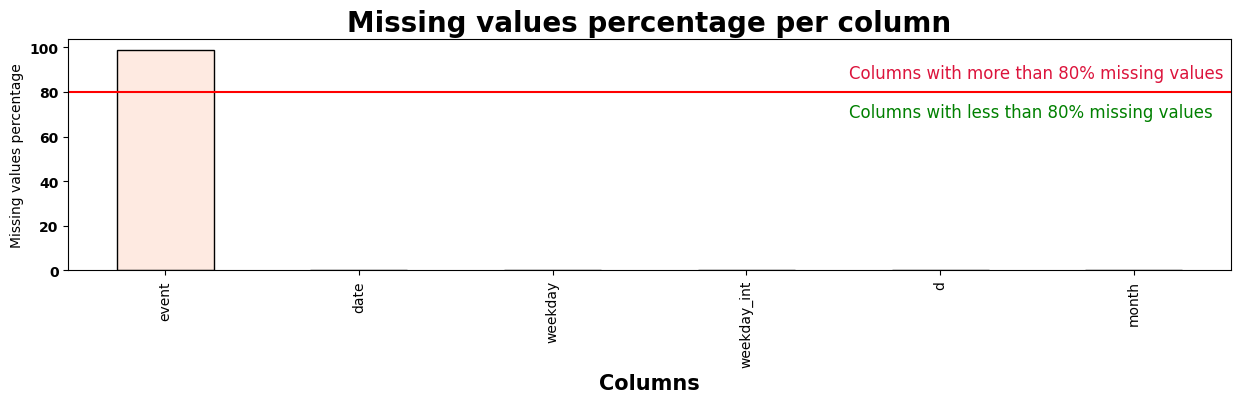

In [15]:
import matplotlib.pyplot as plt 
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(calendar, 80, color=sns.color_palette('Reds',15))


In [16]:
df_ne = calendar.drop(["event"], axis = 1, inplace = True)


In [17]:
dcols = [c for c in df.columns if 'd_' in c] 

In [18]:
past_sales = df.set_index('id')[dcols].T.merge(calendar.set_index('d')['date'], left_index = True, right_index = True, validate = '1:1').set_index('date')

In [19]:
calendar

,date,weekday,weekday_int,d,month
0,2011-01-29,Saturday,1,d_1,1
1,2011-01-30,Sunday,2,d_2,1
2,2011-01-31,Monday,3,d_3,1
3,2011-02-01,Tuesday,4,d_4,2
4,2011-02-02,Wednesday,5,d_5,2
...,...,...,...,...,...
1908,2016-04-20,Wednesday,5,d_1909,4
1909,2016-04-21,Thursday,6,d_1910,4
1910,2016-04-22,Friday,7,d_1911,4
1911,2016-04-23,Saturday,1,d_1912,4


In [20]:
calendar['date'] = pd.to_datetime(calendar['date'])


Pivotando o df

In [21]:
calendar1 = calendar[['date', 'weekday', 'weekday_int', 'd','month']]

In [22]:
past_sales1 = past_sales.merge(calendar1.set_index('date'), left_index = True, right_index = True, validate = '1:1')

In [23]:
stores = df['store_code'].unique()
depts = df['department'].unique()
a = []
concat = []
for store in stores:
    for dept in depts:
        concat.append(store+'_'+dept)
        cols = [c for c in past_sales1 if store in c and dept in c]
        a.append(past_sales1[cols].sum(axis=1).values)

In [24]:
final = {}
for i in range(0, len(a)):
    final[concat[i]] = a[i]

In [25]:
final.keys()

dict_keys(['NYC_1_ACCESORIES_1', 'NYC_1_ACCESORIES_2', 'NYC_1_HOME_&_GARDEN_1', 'NYC_1_HOME_&_GARDEN_2', 'NYC_1_SUPERMARKET_1', 'NYC_1_SUPERMARKET_2', 'NYC_1_SUPERMARKET_3', 'NYC_2_ACCESORIES_1', 'NYC_2_ACCESORIES_2', 'NYC_2_HOME_&_GARDEN_1', 'NYC_2_HOME_&_GARDEN_2', 'NYC_2_SUPERMARKET_1', 'NYC_2_SUPERMARKET_2', 'NYC_2_SUPERMARKET_3', 'NYC_3_ACCESORIES_1', 'NYC_3_ACCESORIES_2', 'NYC_3_HOME_&_GARDEN_1', 'NYC_3_HOME_&_GARDEN_2', 'NYC_3_SUPERMARKET_1', 'NYC_3_SUPERMARKET_2', 'NYC_3_SUPERMARKET_3', 'NYC_4_ACCESORIES_1', 'NYC_4_ACCESORIES_2', 'NYC_4_HOME_&_GARDEN_1', 'NYC_4_HOME_&_GARDEN_2', 'NYC_4_SUPERMARKET_1', 'NYC_4_SUPERMARKET_2', 'NYC_4_SUPERMARKET_3', 'BOS_1_ACCESORIES_1', 'BOS_1_ACCESORIES_2', 'BOS_1_HOME_&_GARDEN_1', 'BOS_1_HOME_&_GARDEN_2', 'BOS_1_SUPERMARKET_1', 'BOS_1_SUPERMARKET_2', 'BOS_1_SUPERMARKET_3', 'BOS_2_ACCESORIES_1', 'BOS_2_ACCESORIES_2', 'BOS_2_HOME_&_GARDEN_1', 'BOS_2_HOME_&_GARDEN_2', 'BOS_2_SUPERMARKET_1', 'BOS_2_SUPERMARKET_2', 'BOS_2_SUPERMARKET_3', 'BOS_3_ACCE

In [26]:
store_dept = pd.DataFrame(final)
store_dept.head()

,NYC_1_ACCESORIES_1,NYC_1_ACCESORIES_2,NYC_1_HOME_&_GARDEN_1,NYC_1_HOME_&_GARDEN_2,NYC_1_SUPERMARKET_1,NYC_1_SUPERMARKET_2,NYC_1_SUPERMARKET_3,NYC_2_ACCESORIES_1,NYC_2_ACCESORIES_2,NYC_2_HOME_&_GARDEN_1,...,PHI_2_SUPERMARKET_1,PHI_2_SUPERMARKET_2,PHI_2_SUPERMARKET_3,PHI_3_ACCESORIES_1,PHI_3_ACCESORIES_2,PHI_3_HOME_&_GARDEN_1,PHI_3_HOME_&_GARDEN_2,PHI_3_SUPERMARKET_1,PHI_3_SUPERMARKET_2,PHI_3_SUPERMARKET_3
0,528,28,361,181,297,674,2268,522,16,529,...,191,155,1269,256,22,584,148,152,583,2293
1,489,9,350,170,284,655,2198,381,16,461,...,184,128,1121,342,14,541,195,138,585,2383
2,409,6,279,114,214,396,1398,352,16,306,...,154,199,1233,228,20,420,106,127,575,1841
3,383,9,278,123,175,476,1607,344,6,270,...,205,244,1564,183,11,327,94,98,533,1965
4,263,5,195,135,182,354,1496,283,13,217,...,96,147,724,70,4,151,53,87,340,1427


In [27]:
store_dept['date'] = calendar['date']
store_dept['month'] = calendar['month']

In [28]:
store_dept['date'] = pd.to_datetime(store_dept['date'])

Nível mensal de vendas para cada produto

In [29]:
month_level = pd.DataFrame()

In [30]:
store_dept.head()

,NYC_1_ACCESORIES_1,NYC_1_ACCESORIES_2,NYC_1_HOME_&_GARDEN_1,NYC_1_HOME_&_GARDEN_2,NYC_1_SUPERMARKET_1,NYC_1_SUPERMARKET_2,NYC_1_SUPERMARKET_3,NYC_2_ACCESORIES_1,NYC_2_ACCESORIES_2,NYC_2_HOME_&_GARDEN_1,...,PHI_2_SUPERMARKET_3,PHI_3_ACCESORIES_1,PHI_3_ACCESORIES_2,PHI_3_HOME_&_GARDEN_1,PHI_3_HOME_&_GARDEN_2,PHI_3_SUPERMARKET_1,PHI_3_SUPERMARKET_2,PHI_3_SUPERMARKET_3,date,month
0,528,28,361,181,297,674,2268,522,16,529,...,1269,256,22,584,148,152,583,2293,2011-01-29,1
1,489,9,350,170,284,655,2198,381,16,461,...,1121,342,14,541,195,138,585,2383,2011-01-30,1
2,409,6,279,114,214,396,1398,352,16,306,...,1233,228,20,420,106,127,575,1841,2011-01-31,1
3,383,9,278,123,175,476,1607,344,6,270,...,1564,183,11,327,94,98,533,1965,2011-02-01,2
4,263,5,195,135,182,354,1496,283,13,217,...,724,70,4,151,53,87,340,1427,2011-02-02,2


In [31]:
def store_cat_month(month_level):
    for col in store_dept.drop(['date', 'month'], axis = 1).columns:
        month_level[col] = store_dept.resample('M', on='date')[col].sum().values
    return month_level

In [32]:
month_level = store_cat_month(month_level)

In [33]:
month_level = month_level.reset_index()

In [34]:
month_level.rename(columns = {'index': 'Month_'}, inplace = True)
month_level['Month_'] += 1
month_level.head()

,Month_,NYC_1_ACCESORIES_1,NYC_1_ACCESORIES_2,NYC_1_HOME_&_GARDEN_1,NYC_1_HOME_&_GARDEN_2,NYC_1_SUPERMARKET_1,NYC_1_SUPERMARKET_2,NYC_1_SUPERMARKET_3,NYC_2_ACCESORIES_1,NYC_2_ACCESORIES_2,...,PHI_2_SUPERMARKET_1,PHI_2_SUPERMARKET_2,PHI_2_SUPERMARKET_3,PHI_3_ACCESORIES_1,PHI_3_ACCESORIES_2,PHI_3_HOME_&_GARDEN_1,PHI_3_HOME_&_GARDEN_2,PHI_3_SUPERMARKET_1,PHI_3_SUPERMARKET_2,PHI_3_SUPERMARKET_3
0,1,1426,43,990,465,795,1725,5864,1255,48,...,529,482,3623,826,56,1545,449,417,1743,6517
1,2,11855,357,8213,3886,6595,12962,45566,9499,499,...,4810,5727,28016,6679,379,11494,3380,3863,16451,55713
2,3,12066,616,9076,4413,6952,13050,47295,10898,631,...,4868,5861,25897,7265,622,13448,3224,4036,15525,53747
3,4,12655,625,10035,4623,5507,12589,45519,10490,630,...,4040,5178,24396,7621,645,12363,3154,4326,14716,48654
4,5,12261,696,9316,4631,5569,13250,42265,10013,704,...,3580,4988,23098,7331,616,11271,3493,4375,13735,44799


In [35]:
month_level.shape

(64, 71)

In [36]:
month_level = month_level.T

In [37]:
month_level.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Month_,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
NYC_1_ACCESORIES_1,1426,11855,12066,12655,12261,12263,12441,12537,12372,13140,...,16250,16676,15004,15563,15224,16175,15292,14121,14473,12115
NYC_1_ACCESORIES_2,43,357,616,625,696,645,484,412,352,680,...,1241,1257,1048,1809,1457,1406,1094,1156,1289,904
NYC_1_HOME_&_GARDEN_1,990,8213,9076,10035,9316,9880,10958,11618,11263,12062,...,25135,26828,24489,25501,23305,22580,24563,22683,23643,19420
NYC_1_HOME_&_GARDEN_2,465,3886,4413,4623,4631,4755,5009,4674,4267,4373,...,7187,7055,6176,6624,5564,5936,5682,5803,6395,5487


In [38]:
month_level.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Month_,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
NYC_1_ACCESORIES_1,1426,11855,12066,12655,12261,12263,12441,12537,12372,13140,...,16250,16676,15004,15563,15224,16175,15292,14121,14473,12115
NYC_1_ACCESORIES_2,43,357,616,625,696,645,484,412,352,680,...,1241,1257,1048,1809,1457,1406,1094,1156,1289,904
NYC_1_HOME_&_GARDEN_1,990,8213,9076,10035,9316,9880,10958,11618,11263,12062,...,25135,26828,24489,25501,23305,22580,24563,22683,23643,19420
NYC_1_HOME_&_GARDEN_2,465,3886,4413,4623,4631,4755,5009,4674,4267,4373,...,7187,7055,6176,6624,5564,5936,5682,5803,6395,5487


In [39]:
df.columns = df.iloc[0]
month_level.columns = month_level.iloc[0]
month_level.drop(month_level.index[0], inplace = True)

In [40]:
month_level.drop([1], axis = 1, inplace = True)

In [41]:
month_level

Month_,2,3,4,5,6,7,8,9,10,11,...,55,56,57,58,59,60,61,62,63,64
NYC_1_ACCESORIES_1,11855,12066,12655,12261,12263,12441,12537,12372,13140,11036,...,16250,16676,15004,15563,15224,16175,15292,14121,14473,12115
NYC_1_ACCESORIES_2,357,616,625,696,645,484,412,352,680,403,...,1241,1257,1048,1809,1457,1406,1094,1156,1289,904
NYC_1_HOME_&_GARDEN_1,8213,9076,10035,9316,9880,10958,11618,11263,12062,10594,...,25135,26828,24489,25501,23305,22580,24563,22683,23643,19420
NYC_1_HOME_&_GARDEN_2,3886,4413,4623,4631,4755,5009,4674,4267,4373,4137,...,7187,7055,6176,6624,5564,5936,5682,5803,6395,5487
NYC_1_SUPERMARKET_1,6595,6952,5507,5569,6281,6726,5785,5590,6571,5701,...,12007,10666,9074,9049,6944,10596,9101,9186,10148,7030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PHI_3_HOME_&_GARDEN_1,11494,13448,12363,11271,12068,12338,12466,13542,14430,12655,...,19969,18987,18832,20306,18431,18343,18897,19697,20043,16420
PHI_3_HOME_&_GARDEN_2,3380,3224,3154,3493,3304,3428,3292,3225,3380,3153,...,4040,4255,3131,3448,3515,3876,4101,4585,4710,4020
PHI_3_SUPERMARKET_1,3863,4036,4326,4375,3762,4243,4054,4760,4919,5071,...,8445,7514,7289,7481,7387,8962,8753,8318,7920,5814
PHI_3_SUPERMARKET_2,16451,15525,14716,13735,14472,14244,15336,16720,16831,16424,...,10960,11827,11647,15626,14779,14782,16221,15832,17219,15048


Modelagem

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
ss = StandardScaler()
features = ss.fit_transform(month_level)

In [44]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
        "max_iter": 300, }
# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

Elbow

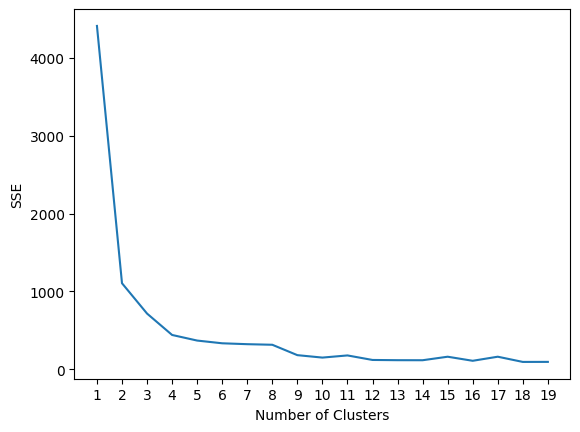

In [45]:
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Como selecionar o nº ideal de clusters

In [46]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.



  Using cached kneed-0.8.5-py3-none-any.whl (10 kB)


In [47]:
from kneed import KneeLocator

ModuleNotFoundError: No module named 'kneed'

In [ ]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [ ]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(features)

KMeans(init='random', n_clusters=4)

In [ ]:
KMeans(init='random', n_clusters=4)

KMeans(init='random', n_clusters=4)

In [ ]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = month_level.index.values
cluster_map['cluster'] = kmeans.labels_

In [ ]:
cluster_map.head()

,data_index,cluster
0,NYC_1_ACCESORIES_1,3
1,NYC_1_ACCESORIES_2,2
2,NYC_1_HOME_&_GARDEN_1,3
3,NYC_1_HOME_&_GARDEN_2,2
4,NYC_1_SUPERMARKET_1,2


In [ ]:
unique_clusters = cluster_map['cluster'].unique()
clusters = {}
for cluster in unique_clusters:
    similar_indices = cluster_map[cluster_map['cluster'] == cluster]['data_index']
    clusters[cluster] = similar_indices
clusters.keys()

dict_keys([3, 2, 1, 0])

Plotando as séries temporais de alguns produtos de cada cluster:

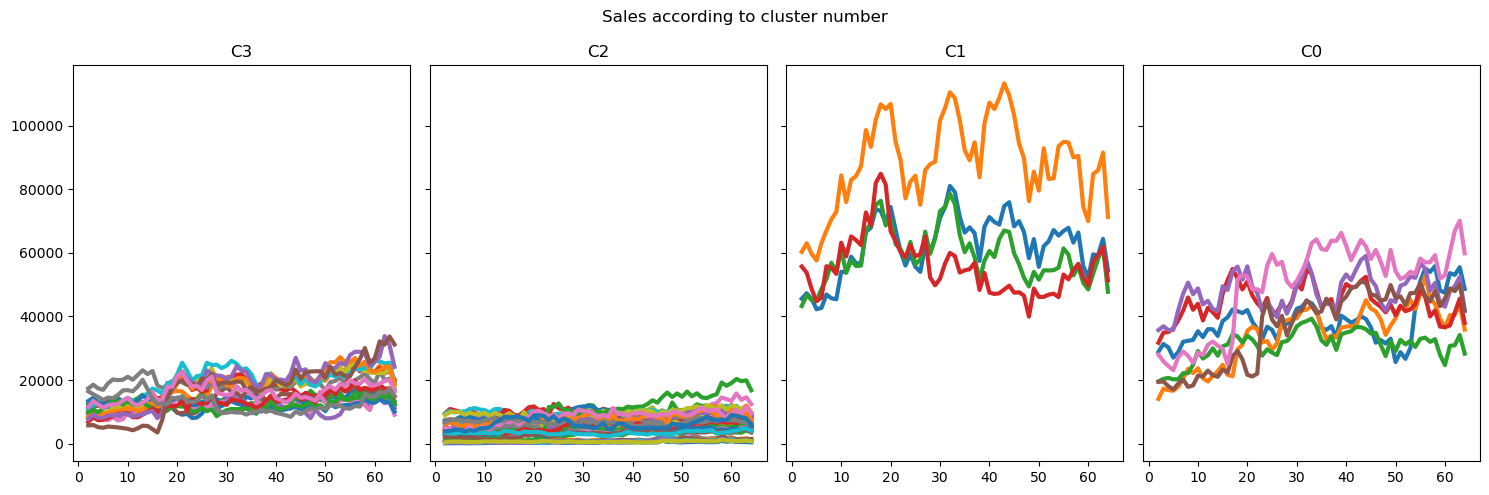

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
axes = axes.flatten()
ax_idx = 0
for key in clusters.keys():
    plt.axes(axes[ax_idx])
    cluster = clusters[key].values
    for i in range(0, len(cluster)):
        plt.plot(month_level.loc[cluster[i]],
                lw = 3,
            )
    ax_idx += 1
    plt.title("C" + str(key))
plt.suptitle('Sales according to cluster number')
plt.tight_layout()
plt.show()